Option 3 No Dividend Reinvestment

In [1]:
# Import the required libraries and dependencies
import os
import numpy
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
# by calling the load_dotenv function
load_dotenv()

True

### Evaluate the MFST Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing price of Microsoft (ticker: MSFT).For the prototype, assume that the member holds 300 shares of MSFT, which represents their portfolio. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `MSFT` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `MSFT` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in (MSFT).

In [3]:
# Current amount of shares held in MSFT.
msft_shares = 300


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [4]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [5]:
# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [6]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['MSFT']

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2021-10-29", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-10-29", tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `MSFT` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [7]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
msft_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Review the first 5 rows of the Alpaca DataFrame
msft_portfolio.head()

MSFT                              
                             open high    low   close    volume
time                                                           
2021-10-29 00:00:00-04:00  324.14  332  323.9  331.64  26504382

#### Step 5: Navigating the Alpaca response DataFrame, select the 'MSFT` closing prices, and store them as variables.

In [8]:
# Access the closing price for MSFT from the Alpaca DataFrame
# Converting the value to a floating point number
msft_close_price = float(msft_portfolio['MSFT']['close'])
# Print the MSFT closing price
print(f'The MSFT closing price is: ${msft_close_price:.2f}')

The MSFT closing price is: $331.64


In [9]:
# Access the total value of the Microsoft holding by multiplying the closing price by the number of shares already determines.
msft_value=msft_close_price*msft_shares

In [10]:
# Set start and end dates of 5 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 5 years back from that date 
start_date = "2016-10-29" 
end_date = "2021-10-29"

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows=1000

In [11]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
five_yr_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date, 
    end = end_date,
    limit = limit_rows
).df

# Display both the first and last five rows of the DataFrame
display(five_yr_portfolio.head())
display(five_yr_portfolio.tail())

MSFT                               
                            open   high    low  close    volume
time                                                           
2017-11-13 00:00:00-05:00  83.66  83.94  83.46  83.93   9097109
2017-11-14 00:00:00-05:00  83.50  84.10  82.98  84.05  15246771
2017-11-15 00:00:00-05:00  83.47  83.69  82.69  82.99  14184790
2017-11-16 00:00:00-05:00  83.10  83.42  82.94  83.19  16201819
2017-11-17 00:00:00-05:00  83.12  83.12  82.24  82.37  17427406

MSFT                                      
                             open      high       low   close    volume
time                                                                   
2021-10-27 00:00:00-04:00  316.00  326.0973  316.0000  323.14  45222343
2021-10-28 00:00:00-04:00  324.32  324.8700  321.3601  324.32  21324602
2021-10-29 00:00:00-04:00  324.14  332.0000  323.9000  331.64  26504382
2021-11-01 00:00:00-04:00  331.40  331.4900  326.3700  329.38  22920008
2021-11-02 00:00:00-04:00  330.21  333.4500  330.0000  333.26  21366225

#### Step 2: Run a Monte Carlo simulation of 500 samples and 10 years for portfolio, and then plot the results.

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

### Analyze the Retirement Portfolio Forecasts

Using the current value of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [12]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f'The current balance of the MSFT portfolio is: ${msft_value:.2f}')

The current balance of the MSFT portfolio is: $99492.00


In [13]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
ten_year_simulation = MCSimulation(
    portfolio_data=five_yr_portfolio,
    #weights=[0.20, 0.80],
    num_simulation=500,
    num_trading_days=252*10,
)
# Review the simulation input data
ten_year_simulation.portfolio_data.head()

MSFT                                            
                            open   high    low  close    volume daily_return
time                                                                        
2017-11-13 00:00:00-05:00  83.66  83.94  83.46  83.93   9097109          NaN
2017-11-14 00:00:00-05:00  83.50  84.10  82.98  84.05  15246771     0.001430
2017-11-15 00:00:00-05:00  83.47  83.69  82.69  82.99  14184790    -0.012612
2017-11-16 00:00:00-05:00  83.10  83.42  82.94  83.19  16201819     0.002410
2017-11-17 00:00:00-05:00  83.12  83.12  82.24  82.37  17427406    -0.009857

In [14]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
ten_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988490,1.000916,1.030449,1.037459,1.016613,0.992360,1.018375,0.998606,1.055104,0.968692,...,0.993006,1.007696,1.035509,1.000844,1.016796,1.013544,1.023929,0.989838,0.989337,1.023648
2,0.964482,1.018750,1.057938,1.035348,1.040292,1.013035,0.996427,1.004298,1.052115,0.954649,...,0.986430,1.007247,1.029548,1.013282,1.014853,1.007858,1.056929,0.988563,1.001761,1.004119
3,0.964096,1.009751,1.048383,1.019098,1.018320,1.020044,0.965555,0.998283,1.043087,0.973931,...,0.975603,1.010423,1.030747,1.015543,1.003637,1.011223,1.056458,0.991352,0.978470,1.025319
4,0.967389,0.998653,1.077780,0.992033,0.999878,1.000138,0.972119,0.999679,1.069480,0.986365,...,0.971775,1.028278,1.013741,0.997169,1.023869,1.028148,1.078812,0.983933,0.962176,0.996443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,111.303580,36.487707,20.439749,37.032402,36.522002,12.721839,37.820754,15.900942,119.158306,43.352754,...,56.451239,45.043259,25.479776,51.902452,110.494652,5.979216,67.402155,39.760577,52.773768,42.113216
2517,106.514353,36.336448,20.924536,37.027130,36.491496,12.995194,38.361182,15.443771,122.096726,43.379471,...,55.857679,45.362341,25.850887,51.771668,110.981847,5.768941,68.245517,39.069433,52.706679,41.154787
2518,104.753044,35.512354,20.871484,37.850271,37.501157,12.759323,38.162627,15.556428,121.531576,43.251286,...,56.187925,45.628647,26.824633,50.169765,110.871312,5.798817,70.955147,40.011187,52.242769,40.202017
2519,103.575522,34.389283,20.821488,37.954141,37.567947,12.648142,37.896553,15.711059,120.289527,41.868337,...,57.292819,47.197349,26.973974,51.269043,109.825442,5.661718,69.086738,40.890686,50.892538,38.940987


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

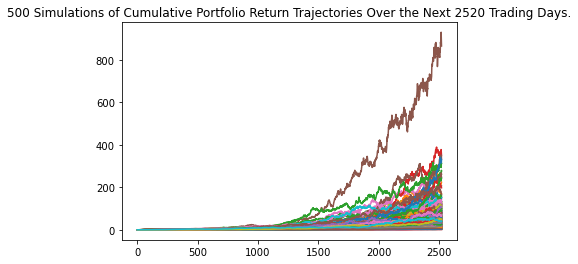

In [15]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
ten_year_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

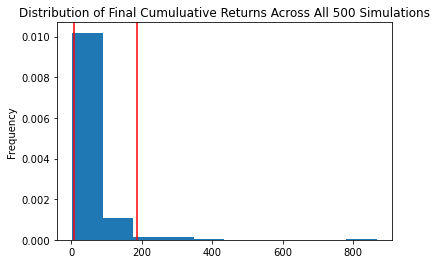

In [16]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
ten_year_simulation.plot_distribution()


In [17]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
ten_tbl=ten_year_simulation.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
ten_tbl

count           500.000000
mean             48.034932
std              60.448265
min               2.285998
25%              17.897898
50%              32.452873
75%              57.300161
max             865.577972
95% CI Lower      6.383517
95% CI Upper    185.410266
Name: 2520, dtype: float64

In [18]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(ten_tbl[8] * msft_value,2)
ci_upper_ten_cumulative_return = round(ten_tbl[9] * msft_value,2)

# Print the result of your calculations
print(f"There is a 95% chance that your current stock/bond portfolio"
      f" over the next ten years will end within in the range of"
      f" ${ci_lower_ten_cumulative_return:.2f} and ${ci_upper_ten_cumulative_return:.2f}.")


There is a 95% chance that your current stock/bond portfolio over the next ten years will end within in the range of $635108.90 and $18446838.14.


In [19]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f'The current balance of the MSFT portfolio is: ${msft_value:.2f}')

The current balance of the MSFT portfolio is: $99492.00


In [20]:
# Configure a Monte Carlo simulation to forecast 20 years cumulative returns
# Run 500 samples.
twenty_year_simulation = MCSimulation(
    portfolio_data=five_yr_portfolio,
    #weights=[0.20, 0.80],
    num_simulation=500,
    num_trading_days=252*20,
)
# Review the simulation input data
twenty_year_simulation.portfolio_data.head()

MSFT                                            
                            open   high    low  close    volume daily_return
time                                                                        
2017-11-13 00:00:00-05:00  83.66  83.94  83.46  83.93   9097109          NaN
2017-11-14 00:00:00-05:00  83.50  84.10  82.98  84.05  15246771     0.001430
2017-11-15 00:00:00-05:00  83.47  83.69  82.69  82.99  14184790    -0.012612
2017-11-16 00:00:00-05:00  83.10  83.42  82.94  83.19  16201819     0.002410
2017-11-17 00:00:00-05:00  83.12  83.12  82.24  82.37  17427406    -0.009857

In [21]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
twenty_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010791,0.992369,0.993703,1.008088,1.024404,1.032647,0.999664,0.991120,0.984709,1.013476,...,1.016962,0.992912,1.029355,0.980192,0.975473,1.019372,1.013007,1.011847,0.979544,1.001269
2,1.020653,1.004146,0.983023,1.017183,1.029523,1.037788,0.978713,1.008667,0.973653,1.039664,...,1.001058,1.007653,1.014806,0.969109,0.966760,1.019705,1.004067,1.024868,0.974120,0.992929
3,1.012095,0.989391,0.989292,1.017189,1.060887,1.039312,0.980984,0.976229,0.978919,1.037246,...,1.015163,1.006251,1.028398,0.982353,0.954105,1.042052,1.000517,1.038788,0.991103,0.987913
4,1.005519,0.994828,0.994885,1.060453,1.041423,1.006108,0.998709,0.966559,0.990359,1.022157,...,1.021771,1.023258,1.033500,0.994160,0.944585,1.040071,0.975380,1.025581,1.015132,0.994039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,291.527247,446.365822,2490.136237,2387.851542,581.419416,178.872404,1183.270994,1233.255009,121.437948,313.415722,...,75.994437,1083.673097,8304.099569,686.790018,731.390803,935.732263,1931.480314,5405.188396,3063.897602,1043.771945
5037,287.915503,443.354255,2509.145607,2478.073912,574.586363,172.170216,1181.309464,1266.421268,118.001867,317.539520,...,76.528171,1064.693110,8198.005790,683.641970,733.440674,909.352434,1917.478336,5450.757040,3093.952127,1045.993329
5038,291.254750,455.336266,2481.468692,2412.670664,573.160002,167.406112,1169.799998,1283.244011,119.657552,322.964912,...,78.224361,1055.098626,8242.592360,666.797272,735.151953,897.168310,1983.177588,5434.651109,3122.625445,1034.072102
5039,291.725064,458.836664,2486.306714,2390.911141,584.449765,172.148253,1190.176605,1277.199222,115.768543,323.435208,...,77.134092,1038.458080,8592.595012,681.500759,742.010098,909.488849,2060.382796,5468.607431,3088.185636,1032.722388


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 5040 Trading Days.'}>

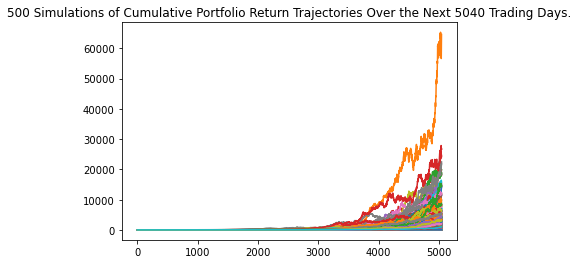

In [22]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
twenty_year_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

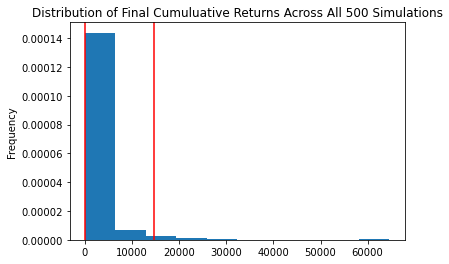

In [23]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
twenty_year_simulation.plot_distribution()


In [24]:
# Generate summary statistics from the 20-year Monte Carlo simulation results
# Save the results as a variable
twenty_tbl=twenty_year_simulation.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
twenty_tbl

count             500.000000
mean             2368.985377
std              4499.717054
min                30.835219
25%               379.799104
50%              1036.300569
75%              2448.262822
max             64588.936065
95% CI Lower       82.756059
95% CI Upper    14618.619242
Name: 5040, dtype: float64

In [25]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_twenty_cumulative_return = round(twenty_tbl[8] * msft_value,2)
ci_upper_twenty_cumulative_return = round(twenty_tbl[9] * msft_value,2)

# Print the result of your calculations
print(f"There is a 95% chance that your current stock/bond portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower_twenty_cumulative_return} and ${ci_upper_twenty_cumulative_return}.")

There is a 95% chance that your current stock/bond portfolio over the next year will end within in the range of $8233565.83 and $1454435665.61.


In [26]:
# Print the current balance of the MSFT portfolio
print(f'The current balance of the MSFT portfolio is: ${msft_value:.2f}')

The current balance of the MSFT portfolio is: $99492.00


In [27]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
thirty_year_simulation = MCSimulation(
    portfolio_data = five_yr_portfolio,
    num_simulation = 500,
    num_trading_days = 252 * 30,
)
# Review the simulation input data
thirty_year_simulation.portfolio_data.head()
# Set number of simulations
num_sims = 500

In [28]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
thirty_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.041410,1.018112,1.034729,0.985495,0.991103,1.018477,0.985107,1.019150,1.020589,1.008973,...,1.001201,1.037198,1.002414,1.000889,1.008081,1.022766,1.014470,1.010699,0.993313,0.998707
2,1.033434,1.000167,0.996656,0.981538,0.987100,1.006668,0.984800,1.012539,1.032130,1.038338,...,0.987610,1.044168,0.993831,0.970944,1.012270,1.024746,1.012269,0.992018,0.995509,1.004868
3,1.052441,0.999590,0.984550,1.001336,0.999587,1.026280,0.976858,0.988148,1.012751,1.024584,...,1.022386,1.034274,0.993480,1.002580,1.027995,1.037665,0.988238,0.986962,0.991042,0.985324
4,1.025211,0.979307,0.992663,1.030971,0.975483,1.051577,0.960629,0.999912,1.004933,1.007024,...,1.021384,1.017816,1.042242,1.019506,1.006405,1.035281,0.970666,0.973022,0.984733,0.983995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,54121.553769,10797.277161,22524.887458,14654.348160,217195.596269,188620.296156,18728.715824,94787.132775,8968.558017,89606.727848,...,153165.171683,7602.569901,52227.662403,484572.938317,64268.217910,401583.361463,8296.721341,1478.294186,14978.797714,140173.689366
7557,54618.844598,10785.703433,22750.354177,14759.206702,213185.705855,192876.689252,19055.278140,95632.706957,8924.156138,93835.982482,...,157740.536539,7801.711115,52349.639745,466343.864808,64684.479094,403491.621801,8287.131308,1482.970964,14791.474693,141931.089897
7558,53836.084590,10832.739962,22662.825729,14948.005404,215557.876589,195822.261961,19176.302576,93750.765544,8860.164388,92046.534365,...,161137.986561,7964.741860,52107.355843,464160.600679,66259.273711,410323.948100,8308.858452,1549.139783,14838.269000,144417.974915
7559,54132.202756,11032.817804,23611.508930,14512.765402,222107.510373,192309.968173,18354.078937,92698.755270,8674.508386,91372.976617,...,164854.663187,8146.794017,50282.440837,461515.523486,67576.372193,421109.450468,8499.242356,1556.531297,14965.997266,148566.930899


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

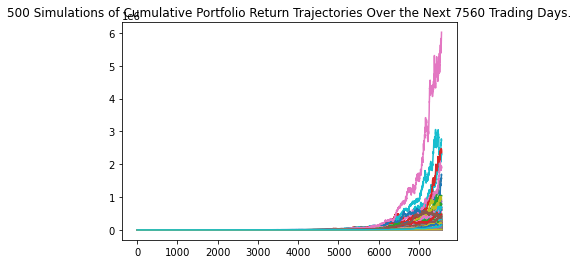

In [29]:
### Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
thirty_year_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

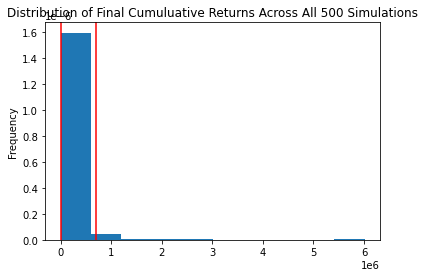

In [30]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
thirty_year_simulation.plot_distribution()

In [31]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
thirty_tbl=thirty_year_simulation.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
thirty_tbl

count           5.000000e+02
mean            1.325757e+05
std             3.772068e+05
min             2.259508e+02
25%             1.216027e+04
50%             3.832258e+04
75%             1.068308e+05
max             6.017501e+06
95% CI Lower    1.477469e+03
95% CI Upper    7.005021e+05
Name: 7560, dtype: float64

In [32]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(thirty_tbl[8] * msft_value,2)
ci_upper_thirty_cumulative_return = round(thirty_tbl[9] * msft_value,2)

# Print the result of your calculations
print(f"There is a 95% chance that your current stock/bond portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")

There is a 95% chance that your current stock/bond portfolio over the next year will end within in the range of $146996304.16 and $69694353749.27.
